### Classify Genetic Variations/Mutations using Text from Clinical Evidence

1. The Data in the four files we made available via the competition website (training_variants, training_text, test_variants and test_text)
2. Since this is a text modeling competition; Participants can use pre-trained text models, such as word2vec, Glove, etc
3. Also, publicly available data sources in the Bioinformatics domain are allowed. Participants can use external data such as Gene Function, or Molecular Pathways; that might contribute some sort of signal to the input data.
### Goal:
Develop algorithms to classify  tumor growth (aka drivers) of genetic mutations in the presence of mutation that do not affect the tumors (passenger) based on clinical evidence (text).
#### Load libraries

In [36]:
#Import libraries
import os
import pandas as pd
import numpy as np
import os
import sys

### Data Description  (What  is in the data?)
The first step in tackling this challenge is understand the data. 

1.**training variants** - a comma separated file containing the description of the genetic mutations used for training. Fields are:
* ID : the id of the row used to link the mutation to the clinical evidence), 
* Gene : the gene where this genetic mutation is located), 
* Variation (the aminoacid change for this mutations), 
* Class (1-9 the class this genetic mutation has been classified on)


In [59]:
train_text = pd.read_csv('../data/training_text', 
                         sep = "\|\|", 
                         engine = 'python', 
                         header = None, 
                         skiprows = 1, 
                         names = ["ID","Text"])
test_text = pd.read_csv('../data/test_text', 
                        sep = "\|\|", 
                        engine = 'python',
                        header = None, 
                        skiprows = 1, 
                        names = ["ID","Text"])

train_variants = pd.read_csv('../data/training_variants')
test_variants = pd.read_csv('../data/test_variants')

train_variants['Text'] = train_text.Text
test_variants['Text'] = test_text.Text

print("Train Variant".ljust(15), train_variants.shape)
print("Train Text".ljust(15), train_text.shape)
print("Test Variant".ljust(15), test_variants.shape)
print("Test Text".ljust(15), test_text.shape)

Train Variant   (3321, 5)
Train Text      (3321, 2)
Test Variant    (5668, 4)
Test Text       (5668, 2)


> **We have more samples of test data than training data. As mentioned in data introduction, some of the test data is machine-generated to prevent hand labelling.**

### Data Preparation

#### Variant dataframes

In [50]:
test_variants.head()

,ID,Gene,Variation,Text
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...


In [51]:
train_variants.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [1]:
#Group by class and then by Gene
#train_variants.groupby('Class')['Gene'].value_counts().unstack().fillna(0)

References
1. [Pandas Trick](https://medium.com/towards-data-science/pandas-tips-and-tricks-33bcc8a40bb9)

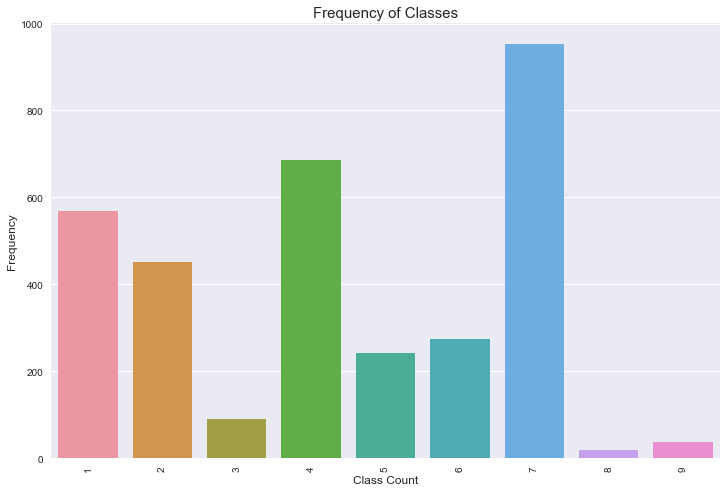

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

plt.figure(figsize=(12,8))
sns.countplot(x="Class", data=train_variants)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Class Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Classes", fontsize=15)
plt.show()

In [74]:
train = pd.merge(train_text, train_variants, how='left', on='ID').fillna('')
y = train['Class'].values
train = train.drop(['Class'], axis=1)

In [75]:
train.head()

,ID,Text_x,Gene,Variation,Text_y
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,FAM58A,Truncating Mutations,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...,CBL,W802*,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...,CBL,Q249E,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...,CBL,N454D,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...,CBL,L399V,Oncogenic mutations in the monomeric Casitas B...
